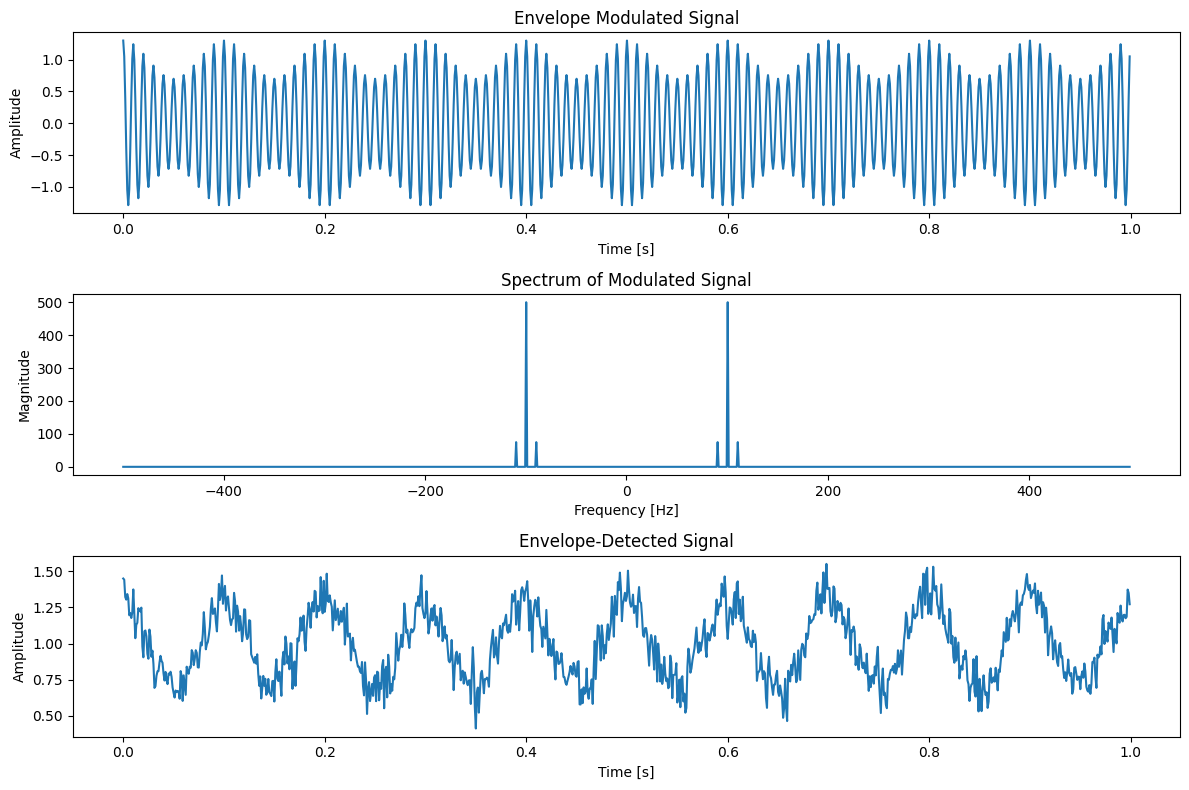

(array([ 1.3       ,  1.05124317,  0.40099109, -0.40008003, -1.04409707,
        -1.28531695, -1.03467849, -0.39289908,  0.39025509,  1.01393969,
         1.2427051 ,  0.99602449,  0.3765961 , -0.372478  , -0.96372305,
        -1.17633558, -0.93906489, -0.35367802,  0.34848891,  0.8983627 ,
         1.0927051 ,  0.8693753 ,  0.3263882 , -0.32063602, -0.82425657,
        -1.        , -0.79377742, -0.29739796,  0.29164579,  0.74865869,
         0.9072949 ,  0.71967129,  0.26954508, -0.26435597, -0.6789691 ,
        -0.82366442, -0.65431094, -0.24555599,  0.24143789,  0.6220095 ,
         0.7572949 ,  0.6040943 ,  0.2277789 , -0.22513491, -0.5833555 ,
        -0.71468305, -0.57393692, -0.21795396,  0.2170429 ,  0.56679082,
         0.7       ,  0.56679082,  0.2170429 , -0.21795396, -0.57393692,
        -0.71468305, -0.5833555 , -0.22513491,  0.2277789 ,  0.6040943 ,
         0.7572949 ,  0.6220095 ,  0.24143789, -0.24555599, -0.65431094,
        -0.82366442, -0.6789691 , -0.26435597,  0.2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.fftpack import fft, fftshift

# Constants and Signal Parameters
fs = 1000  # Sampling frequency (Hz)
fc = 100   # Carrier frequency (Hz)
fm = 10    # Message frequency (Hz)
mod_index = 0.3  # Modulation index
duration = 1  # Duration of the signal in seconds
t = np.arange(0, duration, 1/fs)  # Time vector

# 1. Generate Sinusoidal Message Signal
message = np.cos(2 * np.pi * fm * t)

# 2. Perform Envelope Modulation
carrier = np.cos(2 * np.pi * fc * t)
modulated_signal = (1 + mod_index * message) * carrier

# 3. Add AWGN Noise
noise_power = 0.01  # Noise power
noise = np.sqrt(noise_power) * np.random.normal(size=len(t))
noisy_signal = modulated_signal + noise

# 4. Envelope Detection
envelope = np.abs(hilbert(noisy_signal))

# 5. Plotting
# Plot the envelope modulated signal
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, modulated_signal)
plt.title('Envelope Modulated Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the spectrum
plt.subplot(3, 1, 2)
f = np.linspace(-fs/2, fs/2, len(t))
modulated_spectrum = fftshift(fft(modulated_signal))
plt.plot(f, np.abs(modulated_spectrum))
plt.title('Spectrum of Modulated Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Plot the envelope-detected signal before low-pass filtering
plt.subplot(3, 1, 3)
plt.plot(t, envelope)
plt.title('Envelope-Detected Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# SNR calculation and comparison will be done next.
modulated_signal, noisy_signal, envelope, modulated_spectrum

In [4]:
def snr(signal, noise):
    """ Calculate Signal-to-Noise Ratio (SNR) """
    signal_power = np.mean(np.abs(signal) ** 2)
    noise_power = np.mean(np.abs(noise) ** 2)
    return 10 * np.log10(signal_power / noise_power)

# Calculate SNR before detection (pre-detection SNR)
pre_detection_snr = snr(modulated_signal, noise)

# For post-detection SNR, we consider the envelope-detected signal and noise
# Assuming low-pass filter removes most of the high-frequency noise components
post_detection_snr = snr(envelope, noise)

# Theoretical SNR
# For AM, theoretical SNR post-detection is (1.5 * modulation_index^2) times the pre-detection SNR
theoretical_snr_low = 1.5 * (mod_index**2) * pre_detection_snr
theoretical_snr_high = 1.5 * pre_detection_snr  # For high modulation index close to 1

pre_detection_snr, post_detection_snr, theoretical_snr_low, theoretical_snr_high

(17.343135096301722,
 20.389681739839634,
 2.3413232380007325,
 26.014702644452584)

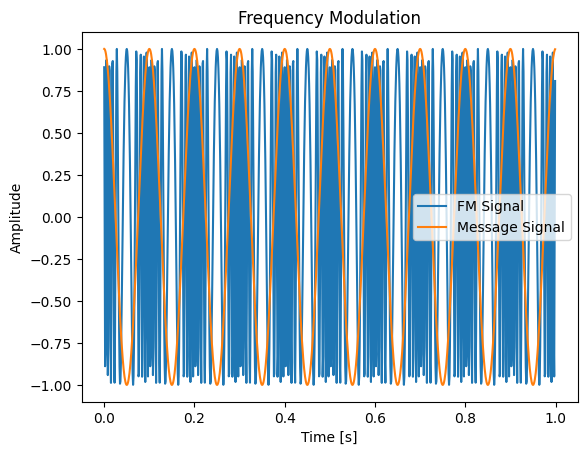

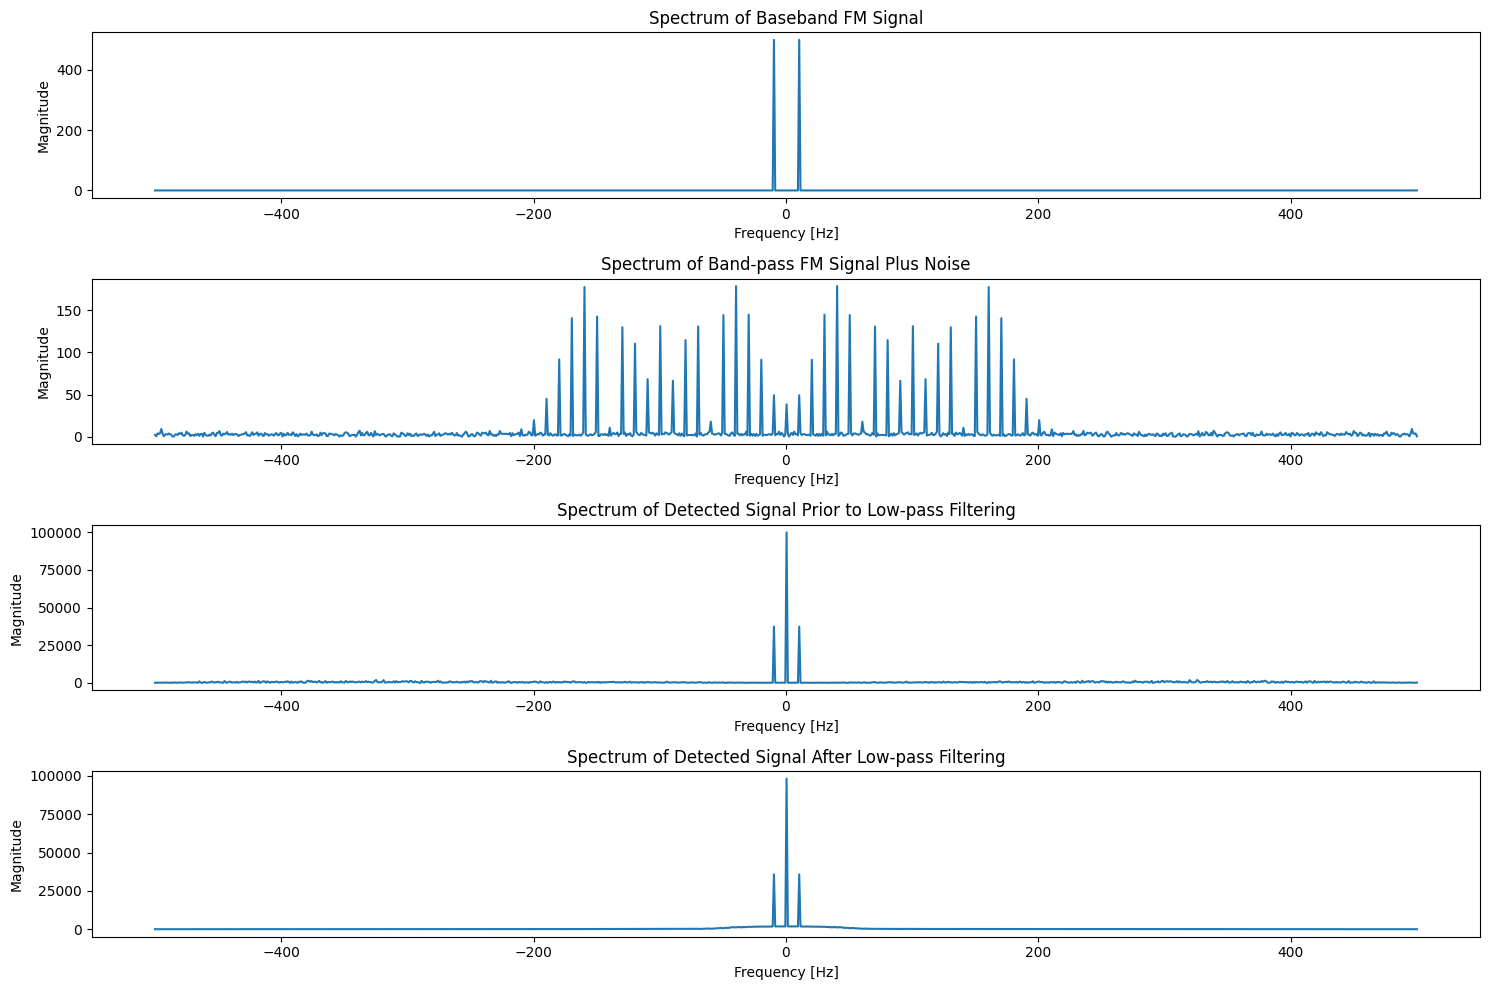

(array([ 8.91006524e-01,  9.29882187e-04, -8.88887794e-01, -8.16585400e-01,
         1.28922285e-01,  9.34116317e-01,  7.63910802e-01, -1.84296871e-01,
        -9.41355302e-01, -7.76296482e-01,  1.20496093e-01,  8.96676519e-01,
         8.71156016e-01,  1.06446001e-01, -7.32542477e-01, -9.87769662e-01,
        -5.08478106e-01,  3.16391519e-01,  9.13125284e-01,  9.27964816e-01,
         4.03166770e-01, -3.24550238e-01, -8.66004669e-01, -9.86624501e-01,
        -6.81015318e-01, -1.20535947e-01,  4.59914978e-01,  8.66004669e-01,
         9.99865901e-01,  8.64066643e-01,  5.31690660e-01,  1.05554597e-01,
        -3.16391519e-01, -6.61802536e-01, -8.90770012e-01, -9.92757267e-01,
        -9.78546697e-01, -8.71156016e-01, -6.98108038e-01, -4.86019145e-01,
        -2.57516054e-01, -3.00078002e-02,  1.84296871e-01,  3.77676128e-01,
         5.45894995e-01,  6.87180327e-01,  8.01312021e-01,  8.88887794e-01,
         9.50768756e-01,  9.87688341e-01,  1.00000000e+00,  9.87542448e-01,
         9.4

In [7]:
from scipy.signal import butter, lfilter, freqz, hilbert

# Constants and Signal Parameters for FM
deviation = 75  # Frequency deviation in Hz

# 1. Generate Baseband Message Signal (Same as before)
message = np.cos(2 * np.pi * fm * t)  # Reusing the same message signal

# 2. Perform Frequency Modulation (FM)
integral_of_message = np.cumsum(message) / fs
fm_signal = np.cos(2 * np.pi * fc * t + 2 * np.pi * deviation * integral_of_message)

# plot fm signal and the message on the same plot
plt.figure()
plt.plot(t, fm_signal, label='FM Signal')
plt.plot(t, message, label='Message Signal')
plt.title('Frequency Modulation')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


# 3. Add AWGN Noise
fm_noisy_signal = fm_signal + noise  # Reusing the same noise

# 4. Frequency Demodulation
# For simplicity, using the derivative of the phase of the analytical signal
analytic_signal = hilbert(fm_noisy_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) * (fs / (2.0 * np.pi))
demodulated_signal = np.insert(instantaneous_frequency, 0, 0)  # Add a value for t=0

# Low-pass filter for demodulated signal (for post-detection)
b, a = butter(5, 2 * 50 / fs, 'low')  # Low-pass filter with a cutoff at 50 Hz
filtered_demodulated_signal = lfilter(b, a, demodulated_signal)

# 5. Plots
plt.figure(figsize=(15, 10))

# Spectrum of the baseband FM signal
plt.subplot(4, 1, 1)
baseband_fm_spectrum = fftshift(fft(message))
plt.plot(f, np.abs(baseband_fm_spectrum))
plt.title('Spectrum of Baseband FM Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Spectrum of the band-pass FM signal plus noise
plt.subplot(4, 1, 2)
bandpass_fm_spectrum = fftshift(fft(fm_noisy_signal))
plt.plot(f, np.abs(bandpass_fm_spectrum))
plt.title('Spectrum of Band-pass FM Signal Plus Noise')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Spectrum of the detected signal prior to low-pass filtering
plt.subplot(4, 1, 3)
detected_spectrum_pre_filter = fftshift(fft(demodulated_signal))
plt.plot(f, np.abs(detected_spectrum_pre_filter))
plt.title('Spectrum of Detected Signal Prior to Low-pass Filtering')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Spectrum of the detected signal after low-pass filtering
plt.subplot(4, 1, 4)
detected_spectrum_post_filter = fftshift(fft(filtered_demodulated_signal))
plt.plot(f, np.abs(detected_spectrum_post_filter))
plt.title('Spectrum of Detected Signal After Low-pass Filtering')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# SNR comparison will be performed next.
fm_signal, fm_noisy_signal, demodulated_signal, filtered_demodulated_signal

In [6]:
# Calculate SNR for FM signals
def snr_fm(signal, noise, fs):
    """ Calculate Signal-to-Noise Ratio (SNR) for FM signals """
    signal_power = np.var(signal)
    noise_power = np.var(noise)
    return 10 * np.log10(signal_power / noise_power)

# Pre-detection SNR for FM
pre_detection_snr_fm = snr_fm(fm_signal, noise, fs)

# Post-detection SNR for FM (after low-pass filtering)
post_detection_snr_fm = snr_fm(filtered_demodulated_signal, noise, fs)

pre_detection_snr_fm, post_detection_snr_fm

(17.170542137554424, 54.691313232286745)